In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skopt import BayesSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import math
from sklearn.linear_model import LinearRegression
from skopt.plots import plot_convergence
from skopt.space import Real, Integer, Categorical
import seaborn as sns
import pickle

In [3]:
# Constant
VALIDATION_PORTION = 0.2
FEATURES = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 
            'PT08.S5(O3)', 'T', 'RH', 'AH']
TARGET = ['NMHC(GT)', 'CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
TARGET_EXCLUSION = ['NMHC(GT)']

# Data Preparation

## day mean

In [8]:
path = 'data/AirQualityUCI.csv'
air_quality = pd.read_csv(path, sep=';', decimal=',')
air_quality = air_quality.dropna(axis=1, how='all')
origin = air_quality
# process data
origin.replace(-200, np.nan, inplace=True)
origin['Datetime'] = origin['Date'] + ' ' + origin['Time']
origin.drop(columns=['Date', 'Time'], inplace=True)
origin['Datetime'] = origin['Datetime'].str.replace('.', ':', regex=False)
origin['Datetime'] = pd.to_datetime(origin['Datetime'], format='%d/%m/%Y %H:%M:%S')
origin.set_index('Datetime', inplace=True)
origin=origin[['NMHC(GT)', 'CO(GT)', 'NO2(GT)', 'NOx(GT)', 'C6H6(GT)',
           'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
           'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']]

In [9]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9471 entries, 2004-03-10 18:00:00 to NaT
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NMHC(GT)       914 non-null    float64
 1   CO(GT)         7674 non-null   float64
 2   NO2(GT)        7715 non-null   float64
 3   NOx(GT)        7718 non-null   float64
 4   C6H6(GT)       8991 non-null   float64
 5   PT08.S1(CO)    8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   PT08.S3(NOx)   8991 non-null   float64
 8   PT08.S4(NO2)   8991 non-null   float64
 9   PT08.S5(O3)    8991 non-null   float64
 10  T              8991 non-null   float64
 11  RH             8991 non-null   float64
 12  AH             8991 non-null   float64
dtypes: float64(13)
memory usage: 1.0 MB


In [10]:
origin.to_csv('origin_data/air_quality_raw.csv', index=True)

<Axes: >

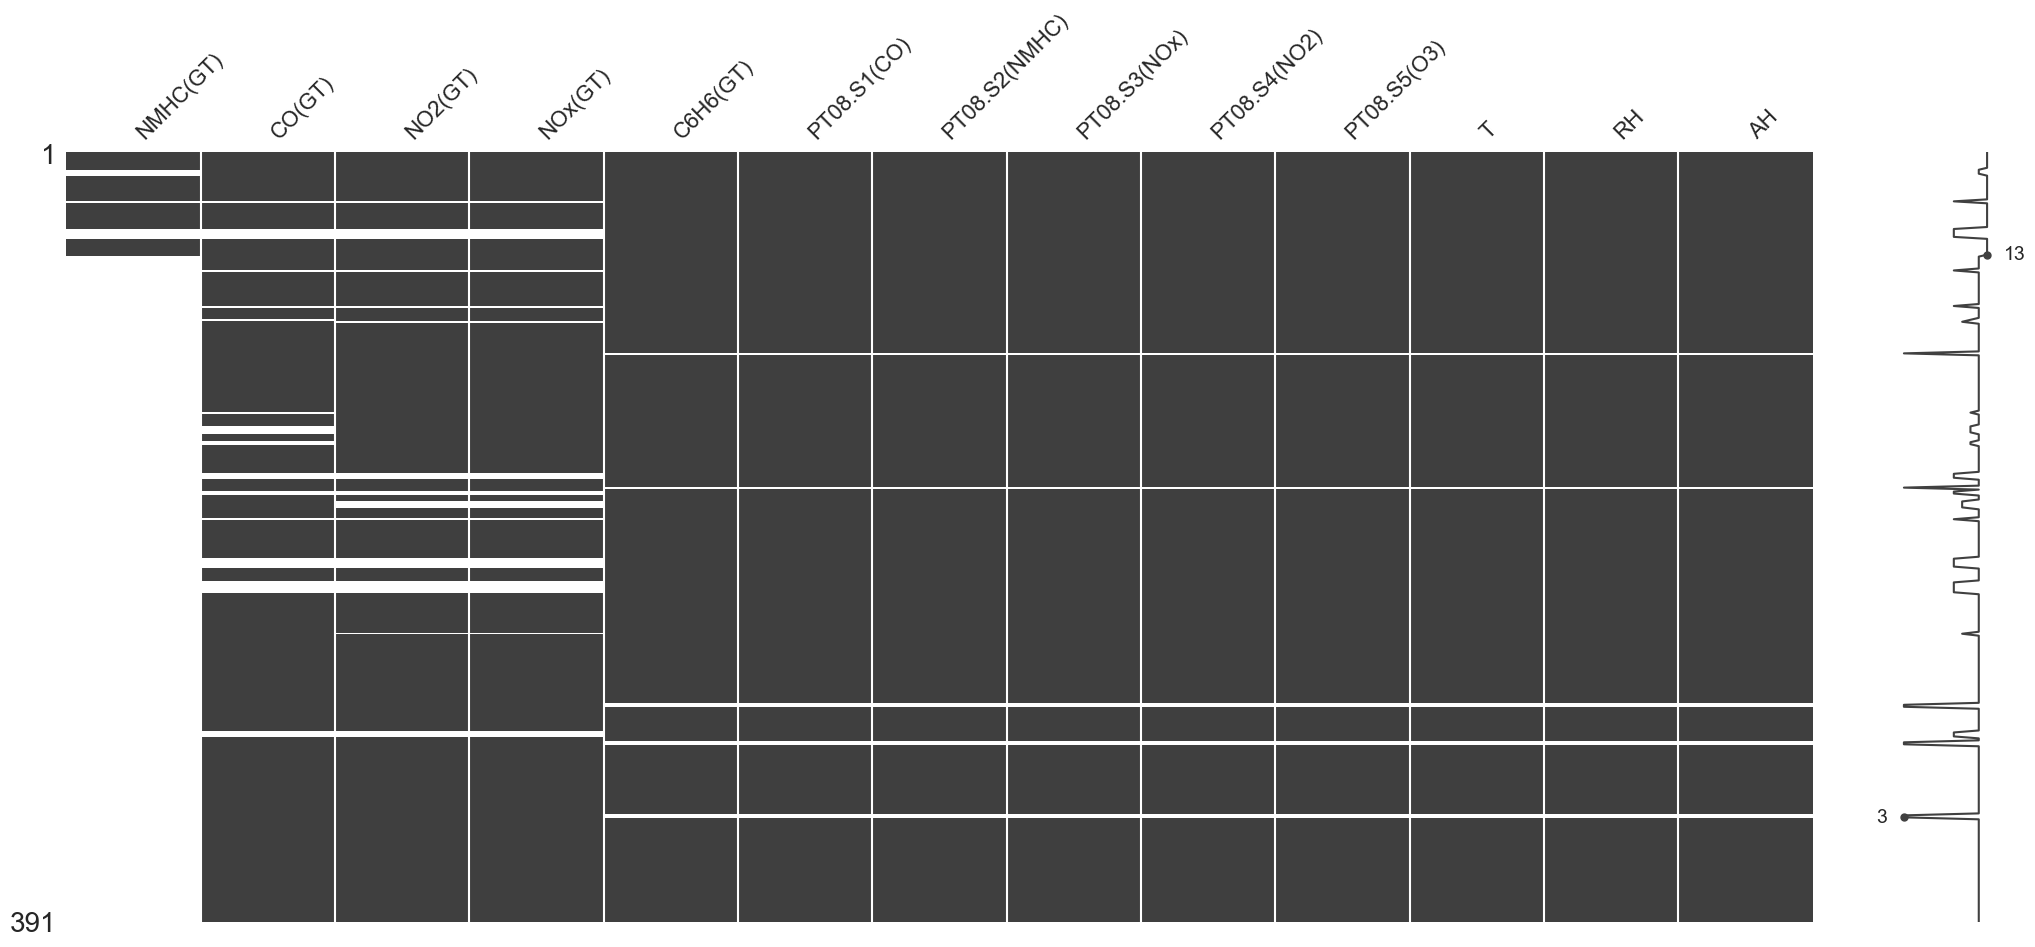

In [6]:
import missingno as msno
msno.matrix(origin)


In [7]:
origin.to_csv('origin_data/air_quality_daily_mean.csv', index=True)

In [3]:
from model_pipeline import get_train_test, MissingValueTransformer, \
    CreateFeaturesTransformer, select_non_nan_rows, preprocess_data

In [5]:
train_dataset, test_dataset = get_train_test()

In [6]:
train_dataset.to_csv('train_data/train_data.csv', index=True)
test_dataset.to_csv('test_data/test_data.csv', index=True)

In [7]:
X_train, Y_train, X_test, Y_test = preprocess_data(train_dataset, test_dataset, 'CO(GT)')

In [9]:
train_cleaned = pd.concat([X_train, Y_train], axis=1)
test_cleaned = pd.concat([X_test, Y_test], axis=1)
train_cleaned.to_csv('train_data/train_data_cleaned.csv', index=True)
test_cleaned.to_csv('test_data/test_data_cleaned.csv', index=True)